Task #1
=======

All we've got is $\eta \sim \mathrm{Uni}(0,1)$.

In [1]:
#import some modeules first
import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns

import math
import itertools 
sns.set_theme()

***Goal***: $\xi_i \sim \mathrm{Bern}(p),\:i = 1,\dots,n$.  
***Implementation***: $\xi_i = \mathbb{I}(\eta < p) + \mathbb{I}(\eta \geqslant p)$

In [2]:
def gen_bernulli(p, size = math.inf):
    """ Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bern(n,p) """
    for i in itertools.count():
        if (i < size):
            if (sps.uniform.rvs() < p):
                yield 1
            else:
                yield 0
        else:
            break
#end of gen_bernulli

print(list(gen_bernulli(0.5,10))) 

[0, 1, 1, 1, 0, 1, 1, 0, 0, 1]


***Goal***: $\beta \sim \mathrm{Bin}(n,p)$  
***Implementation***: $\beta = \sum\limits_{i=1}^{n} \xi_i$.

In [3]:
def gen_binomial(n,p, size = math.inf):
    """ Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bi(n,p) """
    for i in itertools.count():
        if (i < size):
            gen_bern = gen_bernulli(p, n)
            yield np.sum(np.array(list(gen_bern)))
        else:
            break
#end of gen_binomial

print(list(gen_binomial(10,0.5, 10)))

[5, 4, 6, 6, 3, 6, 4, 5, 6, 4]


Illusration of binomial generator:

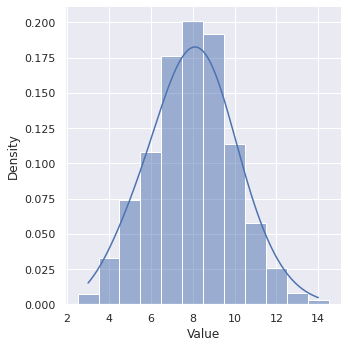

In [13]:
gen_bin = gen_binomial(16,0.5,1000)
df = pd.DataFrame({"Value": list(gen_bin)})
sns.displot(data=df, x="Value", discrete=True, stat="density",
                            kde=True, kde_kws={"bw_adjust": 2})
del gen_bin, df

***Goal***: $\gamma \sim \mathrm{Geom}(p)$  
***Implementation***: $\gamma = \min\{i \in \mathbb{N} : \xi_i = 1\}.$

In [18]:
def gen_geometrical(p, size = math.inf):
    """ Generates random sample [X1, X2,.. X_{size}] where Xi ~ Geom(p) """
    gen_bern = gen_bernulli(p)
    for i in itertools.count():
        if (i < size):
            attempts_number = 1
            while (next(gen_bern) != 1):
                attempts_number += 1
            yield attempts_number
        else:
            break
#end of gen_geometrical

print(list(gen_geometrical(0.5,5)))

[5, 1, 1, 2, 3]


Illustration of memorylessness property: $\mathbb{P}(\gamma > m + n \mid \gamma \geqslant m) = \mathbb{P}(\gamma > n), \forall{m,n} \in \mathbb{N} \cup \{0\}.$  
That means $\frac{\mathbb{P}(\gamma > m + n)}{\mathbb{P}(\gamma \geqslant m)} = \mathbb{P}(\gamma > n), \forall{m,n} \in \mathbb{N} \cup \{0\}.$

In [56]:
gen_geom = gen_geometrical(0.5,35)
a = np.array(list(gen_geom))
print(a)
print(a[a>3])
print(np.size(a[a-(m+n) > 0]))


[1 1 4 1 1 2 1 3 1 4 1 1 4 2 2 3 1 3 1 1 1 1 2 1 2 2 3 1 1 1 1 1 1 2 1]
[4 4 4]
3
